In [1014]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1015]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
sns.set(rc={'figure.figsize':(8,8)})


In [1016]:
bank_data = pd.read_csv('loan.csv',low_memory=False)

If we look into the dataset we find that a majority of columns are null,i.e, don't have any value. So,we have to remove those.

In [1148]:
#function to remove all null columns
def remove_all_null(df):
    print(len(df.columns))
    colmns = list(df.columns)
    for cl in colmns:
        if set(df[cl].isnull())=={True}:
            df.drop(cl,axis=1,inplace=True)
    print(len(df.columns))
    return df

In [1018]:
def bivariate_analysis(column1,column2,type,size):
    sns.set(rc={'figure.figsize':size})
    values = sorted(set(bank_data[column1]))
    if column2!='':
        df = bank_data.groupby([column1,column2,'loan_status'])['id'].count()
        if type!='num':
            df = 100*df/bank_data.groupby([column1])['id'].count()
        df = pd.DataFrame(df).ffill()
        df.reset_index(inplace=True)
        df.rename({'id':'percent'},axis=1,inplace=True)
        ax = sns.catplot(x=column2,y='percent',hue='loan_status',col=column1,col_wrap=2,
                         data=df, height=6, kind="bar", palette="muted")
        print('\n')
    else:
        print('group-by column : {}'.format(column1))
        df = bank_data.groupby([column1,'loan_status'])['id'].count()
        print('group-by column : {}, calculating percent'.format(column1))
        if type!='num':
            df = df/len(bank_data)
        ax = sns.barplot(x=df.index,y=df.values)
        ax.set(xlabel=column1,ylabel='percentage')

In [1139]:
def segmented_univariate(column_name):
    print(100*bank_data.groupby([column_name,'loan_status'])['id'].count()
          /bank_data.groupby([column_name])['id'].count())

In [1019]:
bank_data = remove_all_null(bank_data)

111
57


Above we see only 57 columns are remaining. Among those there few which have more than 30 percent null values.

In [1020]:
df = pd.DataFrame({'percent':(100*bank_data.isnull().sum(axis=0))/len(bank_data)})

In [1021]:
df

,percent
id,0.000000
member_id,0.000000
loan_amnt,0.000000
funded_amnt,0.000000
funded_amnt_inv,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
sub_grade,0.000000


In [1022]:
bank_data.drop(list(df[df['percent']>30].index),axis=1,inplace=True)

In [1023]:
df = pd.DataFrame({'percent':(100*bank_data.isnull().sum(axis=0))/len(bank_data)})

Now among the columns left there are those that have few null values and all other values are constants. The veriability is so less that they can be of no use to us

In [1024]:
print(100*bank_data.groupby('tax_liens')['id'].count()/len(bank_data))
print(100*bank_data.groupby('chargeoff_within_12_mths')['id'].count()/len(bank_data))
print(100*bank_data.groupby('collections_12_mths_ex_med')['id'].count()/len(bank_data))


tax_liens
0.0    99.901805
Name: id, dtype: float64
chargeoff_within_12_mths
0.0    99.859002
Name: id, dtype: float64
collections_12_mths_ex_med
0.0    99.859002
Name: id, dtype: float64


In [1025]:
bank_data.drop(['tax_liens','chargeoff_within_12_mths','collections_12_mths_ex_med'],axis=1,inplace=True)

Also there are some columns which have a constant value without any variation, which again are of no use to us

In [1026]:
#getting columns which are constant
print('column_name','\t','number of unique values')
for column in list(bank_data.columns):
    if len(set(bank_data[column]))==1:
        print(column,2*'\t',len(set(bank_data[column])))

column_name 	 number of unique values
pymnt_plan 		 1
initial_list_status 		 1
policy_code 		 1
application_type 		 1
acc_now_delinq 		 1
delinq_amnt 		 1


In [1027]:
#dropping the above columns as they are not useful for analysis
bank_data.drop(['pymnt_plan','delinq_amnt','acc_now_delinq','application_type','policy_code',
                'initial_list_status','url'],axis=1,inplace=True)

Before further analysis let us look at the business perspective of this case study, which is, we need to find variables from a loan application that can give strong indications to whether a customer will default or not

Now, among the variables we have currently present, many are such that they can be found after the loan application is accepted and the customer is active. Such variables are not of use to us as they will not be available for new customers.

#Following is a list of columns that might actually come in a loan application/credit history
* id
* member_id
* loan_amnt -- amount of loan applied for by applicant
* int_rate  -- calculated and shown before an applicant submits loan
* term  -- term of loan
* grade (assigned by lending club)
* sub-grade (assigned by lending club)
* emp_title -- company name of the applicant
* emp_length -- term of employment
* home_ownership -- home ownership status of the applicant
* annual_inc -- annual income in dollars
* verification_status -- whether annual income is verified or not
* purpose -- the purpose of loan selected by the applicant
* title -- title assigned to the application by the applicant
* zip_code -- residential zip code of the applicant
* addr_state -- address state of the applicant
* dti -- debt to income ratio
* earliest_cr_line -- date of earliest credit line
* inq_last_6mnths -- number of inquires made for credit history of the applicant in last 6 months (included in            credit history)
* open_acc -- number of open credit lines (included in credit history)
* pub_rec -- number of public records present against the applicant (included in credit history)
* revol_bal -- total amount of available revolving credit (e.g. credit card) of the applicant (included in credit history)
* revol_util -- percent of credit utilization , lower is better (included in credit history)
* total_acc -- total number of credit lines (secured and unsecured) (included in credit history)
* pub_rec_bankruptcies -- number of declared bankruptcies by the applicant (included in credit history)

Of these member_id and id both are unique keys, we will keep only one,i.e, id

In [1028]:
bank_data = bank_data.reindex(columns=['id','loan_amnt','term','grade','sub_grade','emp_title','emp_length',
                             'home_ownership','annual_inc','purpose','verification_status','title','zip_code',
                             'addr_state','dti','earliest_cr_line','inq_last_6mths','open_acc',
                            'pub_rec','revol_bal','revol_util','total_acc','pub_rec_bankruptcies','int_rate',
                            'installment','loan_status'
                            ], 
                              copy=False)

In [1029]:
print(pd.DataFrame({'percent':(100*bank_data.isnull().sum(axis=0))/len(bank_data)}))

                       percent
id                    0.000000
loan_amnt             0.000000
term                  0.000000
grade                 0.000000
sub_grade             0.000000
emp_title             6.191303
emp_length            2.706650
home_ownership        0.000000
annual_inc            0.000000
purpose               0.000000
verification_status   0.000000
title                 0.027696
zip_code              0.000000
addr_state            0.000000
dti                   0.000000
earliest_cr_line      0.000000
inq_last_6mths        0.000000
open_acc              0.000000
pub_rec               0.000000
revol_bal             0.000000
revol_util            0.125891
total_acc             0.000000
pub_rec_bankruptcies  1.754916
int_rate              0.000000
installment           0.000000
loan_status           0.000000


Of the above columns let's first inspect emp_title as it has largest amount of null values

In [1030]:
print(bank_data.groupby(['emp_title','loan_status'])['id'].count().sort_values(ascending=False).head(5))

emp_title          loan_status
US Army            Fully Paid     113
Bank of America    Fully Paid      87
IBM                Fully Paid      56
USAF               Fully Paid      50
Kaiser Permanente  Fully Paid      48
Name: id, dtype: int64


In [1031]:
len(set(bank_data[bank_data['emp_title'].notnull()]['emp_title']))/len(bank_data)

0.7256338595563613

The informations are company names and 72.5 percent values are unique, and there is some trends across some institutions like US Army, but preprocessing is needed. This much variation will not be helpful for our analysis and we can drop it.

Next is emp_length

In [1032]:
print(set(bank_data['emp_length']))

{nan, '6 years', '9 years', '8 years', '1 year', '3 years', '7 years', '4 years', '< 1 year', '5 years', '2 years', '10+ years'}


As this is a categorical variable, removing the null values is best option. Also the percent of null values is quite low

Next we have title column

In [1033]:
print(bank_data.groupby(['title','loan_status'])['id'].count().sort_values(ascending=False).tail(5))

title                               loan_status
Private School Tuition              Fully Paid     1
Private Seller Auto Loan.           Fully Paid     1
Private Student Loan                Fully Paid     1
Private Student Loan Consolidation  Fully Paid     1
Malibu                              Fully Paid     1
Name: id, dtype: int64


This column seems to have generic title provided by loan applicant and will not be useful for analysis,so we will drop it. Also, this provides redundant information same as purpose column which is more ordered

revol_util contains percentage of utilisation, so we will remove the null values from it also. Similarly, pub_rec_bankruptcies has only 0.0, 1.0 and 2.0, so we will remove the null values from it

In [1034]:
bank_data = bank_data[(bank_data['pub_rec_bankruptcies'].notnull()) & (bank_data['revol_util'].notnull()) & 
                     (bank_data['emp_length'].notnull())]

In [1035]:
bank_data.drop(['emp_title','title'],axis=1,inplace=True)

Another point to note is that three status are present: Current, Fully Paid and Charged Off.
But we need to only analyse loans that were charged off or fully paid.

In [1036]:
bank_data = bank_data[bank_data['loan_status']!='Current']

In [1037]:
print('Final list of columns')
print(pd.DataFrame({'percent':(100*bank_data.isnull().sum(axis=0))/len(bank_data)}))

Final list of columns
                      percent
id                        0.0
loan_amnt                 0.0
term                      0.0
grade                     0.0
sub_grade                 0.0
emp_length                0.0
home_ownership            0.0
annual_inc                0.0
purpose                   0.0
verification_status       0.0
zip_code                  0.0
addr_state                0.0
dti                       0.0
earliest_cr_line          0.0
inq_last_6mths            0.0
open_acc                  0.0
pub_rec                   0.0
revol_bal                 0.0
revol_util                0.0
total_acc                 0.0
pub_rec_bankruptcies      0.0
int_rate                  0.0
installment               0.0
loan_status               0.0


Of this the loan_status column is out target column

UNIVARIATE ANALYSIS

COLUMN NAME : loan_amnt

In [1038]:
bank_data['loan_amnt'].describe()

count    36800.000000
mean     11149.540761
std       7369.855703
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Text(0,0.5,'Amount In Dollars')

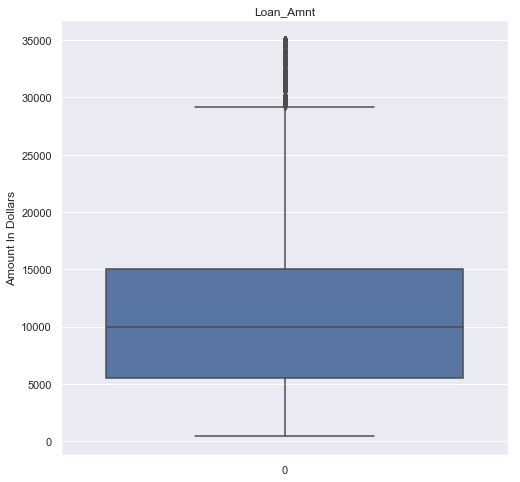

In [1039]:
ax = sns.boxplot(data=bank_data['loan_amnt'])
ax.set_title('Loan_Amnt')
ax.set_ylabel('Amount In Dollars')


Although some values appear as outlier in boxplot,we know from business logic (source lending club website) that dollar 35000 was the maximum amount of money one could borrow on lending club (now increased to dollar 40000). So, these outliers are actually occuring naturally.

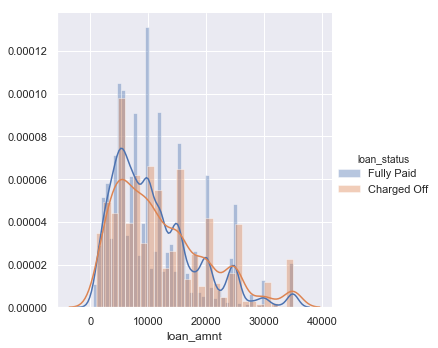

In [1040]:
ax = sns.FacetGrid(bank_data,hue="loan_status",height=5).map(sns.distplot,"loan_amnt").add_legend()
ax.savefig('loan_amnt_dist.png')

We see a very small spread at the edge. Alhough it might be a weak driver we investigate it further.

the boundaries for categorization are selected based on the above plot. At before 15000 mark we see a marked rise 
in fully paid loans, so it taken as first boundary. Between 25000 and 30000 we see marked dip in charged off loans, to capture that 25000 is taken as next boundary.

In [1041]:
def loan_amnt_level(val):
    if val<=15000:
        return 15000
    elif val>15000 and val<=25000:
        return 25000
    elif val>25000 and val<=35000:
        return 35000
bank_data['loan_amnt_cat'] = bank_data.apply(lambda x: loan_amnt_level(x['loan_amnt']),axis=1)

In [1140]:
segmented_univariate('loan_amnt_cat')

loan_amnt_cat  loan_status
15000          Charged Off    13.114278
               Fully Paid     86.885722
25000          Charged Off    17.862739
               Fully Paid     82.137261
35000          Charged Off    24.100418
               Fully Paid     75.899582
Name: id, dtype: float64


So,we see a very distinct variation with loan amount. The higher amounts have higher charge-rate. So, loan_amnt is a driver variable

COLUMN NAME : term

In [1043]:
bank_data['term'] = bank_data.apply(lambda x: int(x['term'][1:3]),axis=1)

Term is a categorical variable. The main number of interest for any categorical variable is the distribution of loans across the categories.

In [1044]:
print('Percentage Distribution of number of loans')
print(100*bank_data.groupby('term')['id'].count()/len(bank_data),'\n')
print('Percentage Distribution of number of charged off loans')
print(100*bank_data[bank_data['loan_status']=='Charged Off'].groupby('term')['id'].count()
                             /len(bank_data[bank_data['loan_status']=='Charged Off']),'\n')

Percentage Distribution of number of loans
term
36    74.853261
60    25.146739
Name: id, dtype: float64 

Percentage Distribution of number of charged off loans
term
36    55.886821
60    44.113179
Name: id, dtype: float64 



group-by column : term
group-by column : term, calculating percent


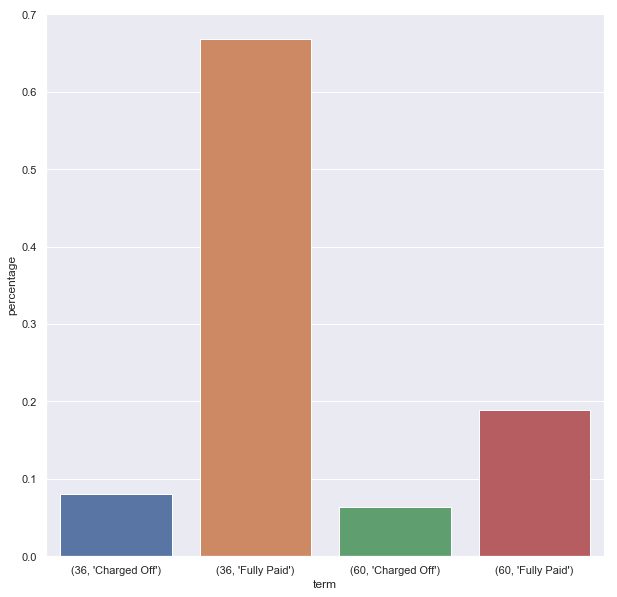

In [1045]:
bivariate_analysis('term','','',(10,10))


We see that although 60 months contains only 25 percent of the data, it has almost 44 percent of charge-off loans,
showing a clear differentiation. So, this is a driver variable

COLUMN NAMES : grade,sub_grade,emp_length and home_ownership

In [1046]:
set(bank_data['grade'])

{'A', 'B', 'C', 'D', 'E', 'F', 'G'}

Percent of data distribution across different grades


Text(0,0.5,'percent')

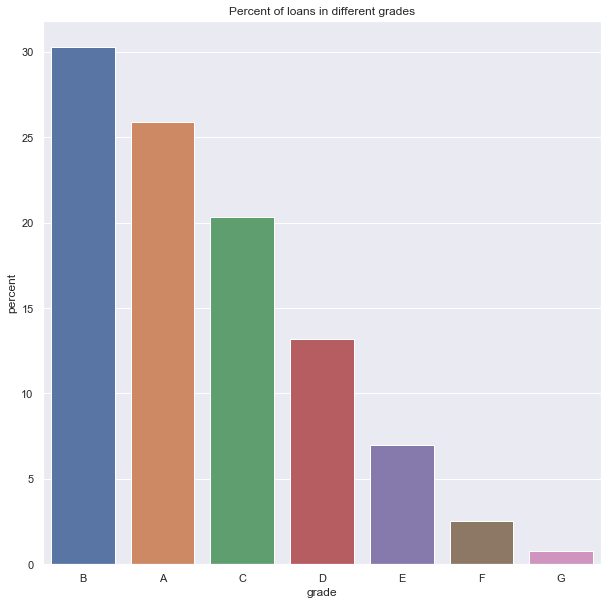

In [1047]:
print('Percent of data distribution across different grades')
df = 100*bank_data.groupby('grade')['id'].count().sort_values(ascending=False)/len(bank_data)
df2 = 100*bank_data[bank_data['loan_status']=='Charged Off'].groupby('grade')['id'].count().\
      sort_values(ascending=False)/len(bank_data[bank_data['loan_status']=='Charged Off'])
ax=sns.barplot(x=df.index,y=df.values)
ax.set_title('Percent of loans in different grades')
ax.set_ylabel('percent')

Text(0,0.5,'percent')

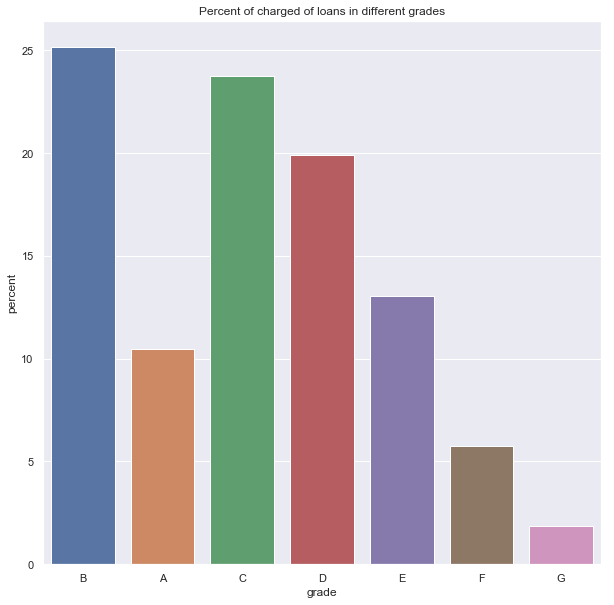

In [1048]:
ax=sns.barplot(x=df.index,y=df2[df.index].values)
ax.set_title('Percent of charged of loans in different grades')
ax.set_ylabel('percent')

We can see a quite interesting differentiation between the two plots. A has about 25 percent of data but only 10 percent of charged off loans, implying it's very safe grade. While D,E,F has only about 13%,8%,3% of data but 20%,13%,6% of charged off loans. So, they are comparatively risky grades.

We can see that grade is a driver variable

Data distribution across different sub-grades


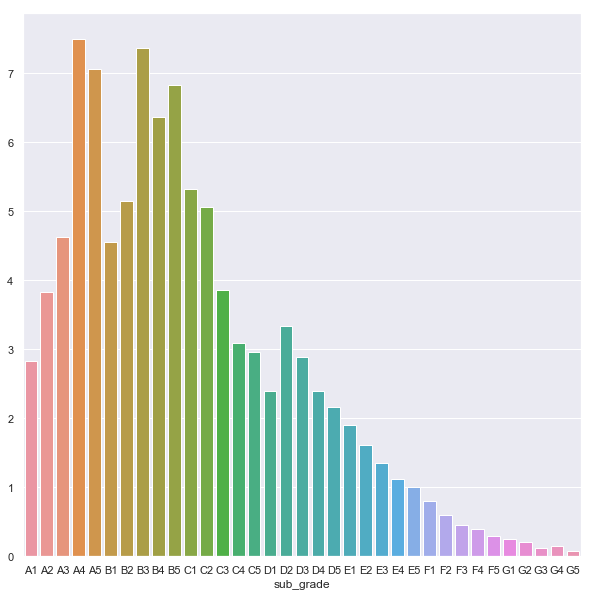

In [1049]:
print('Data distribution across different sub-grades')
ds = 100*bank_data.groupby('sub_grade')['id'].count().sort_values(ascending=False)/len(bank_data)
inx = sorted(set(ds.index))
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(x=ds[inx].index,y=ds[inx].values)

Distribution of charged-off loans across sub-grades


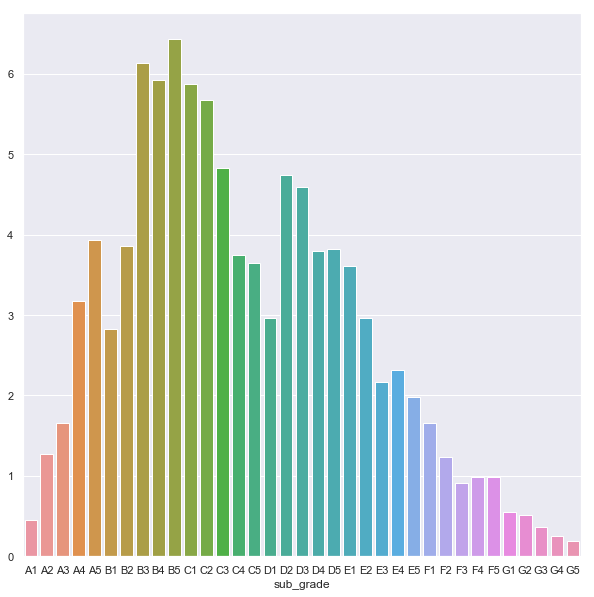

In [1050]:
print('Distribution of charged-off loans across sub-grades')
sns.set(rc={'figure.figsize':(10,10)})
df2 = 100*bank_data[bank_data['loan_status']=='Charged Off'].groupby('sub_grade')['id'].count().\
      sort_values(ascending=False)/len(bank_data[bank_data['loan_status']=='Charged Off'])
sns.barplot(x=df2[inx].index,y=df2[inx].values)

So both the variables are categorical. The top grade is B while top sub grade is A4.We see that for each group, the subgroups almost same distribution for both number of loans and charged-off loans. So, percent wise getting any segementation or specific grouping will not be possible. So, we can negelect sub_grade

Similarly emp_length,home_ownership are also categorical variables, so only the distribution of data can be checked.

In [1051]:
emp_cat = sorted(set(bank_data['emp_length']))
print(emp_cat)
cat = [1,10,2,3,4,5,6,7,8,9,0]
emp_dict = dict(zip(emp_cat,cat))
bank_data['emp_length'] = bank_data.apply(lambda x: emp_dict[x['emp_length']],axis=1)

['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '< 1 year']


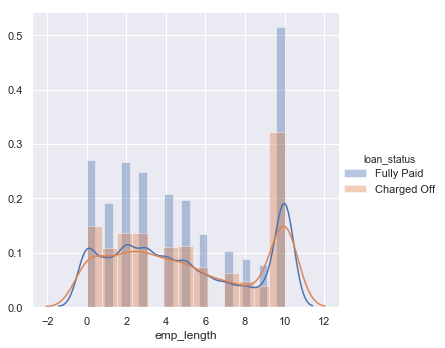

In [1052]:
sns.FacetGrid(bank_data,hue="loan_status",height=5).map(sns.distplot,"emp_length").add_legend()

We see that there is no marked differentiation between different employment length and charge off, as we were expecting

Most people have been more than 10 years in a job. Again we see, the distribution remains same for both nuumber of loans and charged of loans. So ,this is not a significant driver

In [1053]:
home_cat = sorted(set(bank_data['home_ownership']))
print(home_cat)
map_home = [1,2,3,4]
home_dict = dict(zip(home_cat,map_home))
bank_data['home_ownership'] = bank_data.apply(lambda x: home_dict[x['home_ownership']],axis=1)

['MORTGAGE', 'OTHER', 'OWN', 'RENT']


Distribution of loans over home ownership
{'MORTGAGE': 1, 'OTHER': 2, 'OWN': 3, 'RENT': 4}


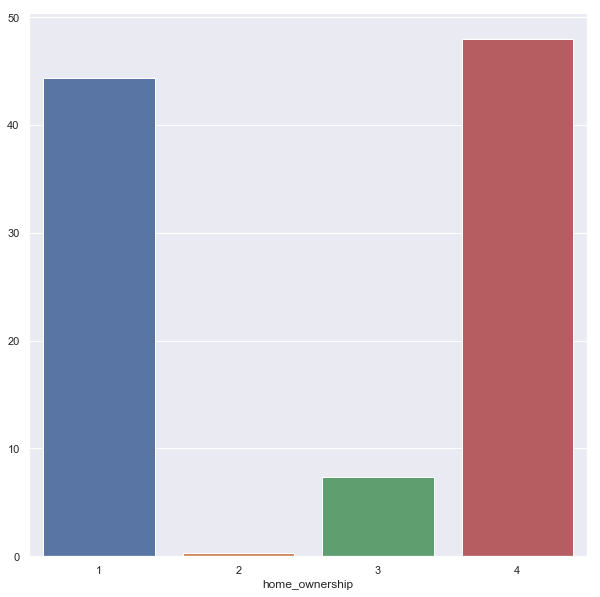

In [1054]:
print('Distribution of loans over home ownership')
print(home_dict)
df= 100*bank_data.groupby('home_ownership')['id'].count().sort_values(ascending=False)/len(bank_data)
sns.barplot(x=df.index,y=df.values)

{'MORTGAGE': 1, 'OTHER': 2, 'OWN': 3, 'RENT': 4}


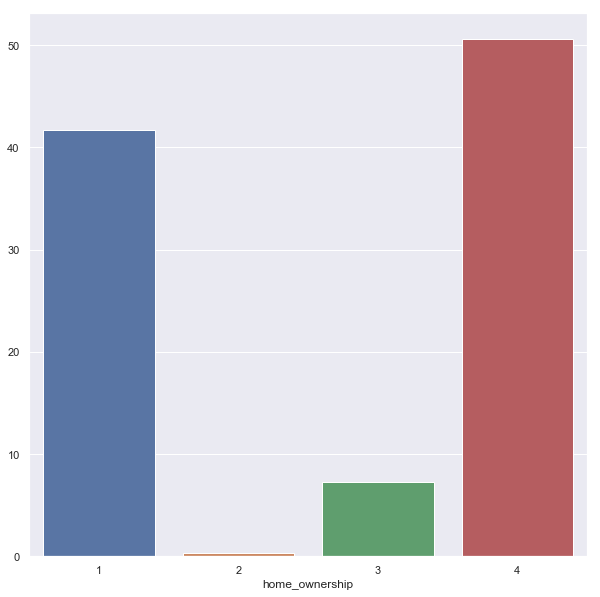

In [1055]:
print(home_dict)
df2 = 100*bank_data[bank_data['loan_status']=='Charged Off'].groupby('home_ownership')['id'].count().\
      sort_values(ascending=False)/len(bank_data[bank_data['loan_status']=='Charged Off'])
sns.barplot(x=df.index,y=df2[df.index].values)

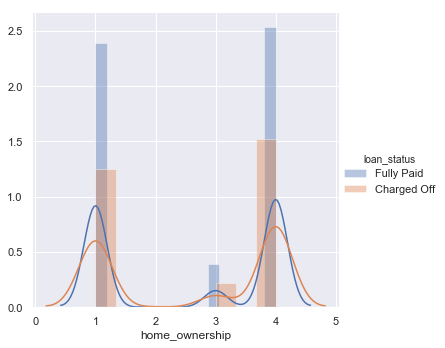

In [1056]:
sns.FacetGrid(bank_data,hue="loan_status",height=5).map(sns.distplot,"home_ownership").add_legend()

No marked differentiation is being shown across different categories.

Here thw first observation is that Other category has very few data. So, it will best to remove this category,as it might shoot up the percent in bivariate analysis.

In [1057]:
bank_data = bank_data[bank_data['home_ownership']!=2]

In [1058]:
print('percent of people with rented or mortgaged home:',33317/len(bank_data))

percent of people with rented or mortgaged home: 0.9077212292938099


More than 90 percent of people have either rented home or have their homes mortgaged

We can see a large percent of people live in rented or mortgaged homes. Now, a mortgaged home implies a higher financial burden on the applicant than a rented home does.
So we can look at own,rented as one cat and mortgaged as other.

In [1059]:
bank_data['home_own_grouping'] = bank_data.apply(lambda x: 1 if x['home_ownership'] in [3,4] else 0,axis=1)

In [1141]:
segmented_univariate('home_own_grouping')

KeyError: 'home_own_grouping'

Still we don't see any marked differentiation

COLUMN NAME : annual_inc

In [1061]:
bank_data['annual_inc'].describe()

count    3.670400e+04
mean     6.942891e+04
std      6.401541e+04
min      4.000000e+03
25%      4.118700e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

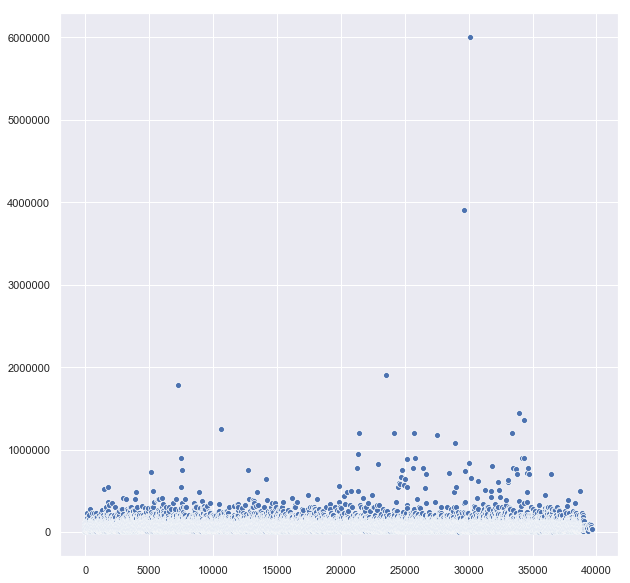

In [1062]:
sns.scatterplot(data=bank_data['annual_inc'])

We can see that annual_inc contains quite a few outliers.
To determine the threshold for the upper-limit we will use the 1.5(Inter Quartile Range) formula.

In [1063]:
#Using 1.5 times interquartile range as threshold
max_val = 8.35*10**4+1.5*(8.35-4.1886)*10**4
print('Percentage of data removed by above threshold :',
      100-100*len(bank_data[bank_data['annual_inc']<=max_val])/len(bank_data))
#so, we are loosing 5 percent data, which is a bit high, trying with 2 times iqr
max_val = 8.35*10**4+2.*(8.35-4.1886)*10**4
print('Percentage of data removed by above threshold :',100-
      100*len(bank_data[bank_data['annual_inc']<=max_val])/len(bank_data))
#trying with 2.5*iqr
max_val = 8.35*10**4+2.5*(8.35-4.1886)*10**4
print('Percentage of data removed by above threshold :',100-
      100*len(bank_data[bank_data['annual_inc']<=max_val])/len(bank_data))
#Now 2% DATA IS  GETTING REMOVED WHICH IS ACCEPTABLE

Percentage of data removed by above threshold : 4.6289232781168295
Percentage of data removed by above threshold : 2.980601569311247
Percentage of data removed by above threshold : 1.9997820401046198


The 2.5 times IQR range is selected because of two reasons:
* the percent of data loss is very low
* only a small fraction (73) of charged off loans is removed. This is important because the disparity between the charged off and fully paid loans is high as it is.

In [1064]:
bank_data = bank_data[bank_data['annual_inc']<=max_val]

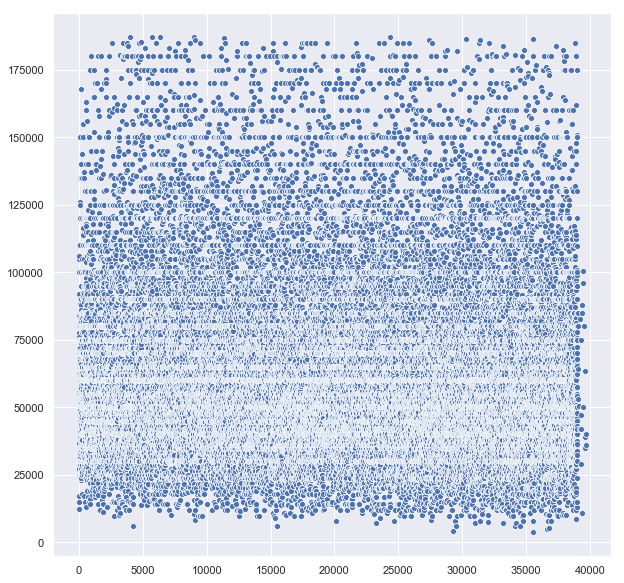

In [1065]:
sns.scatterplot(data=bank_data['annual_inc'])

We can see from above no major outlier exists now.

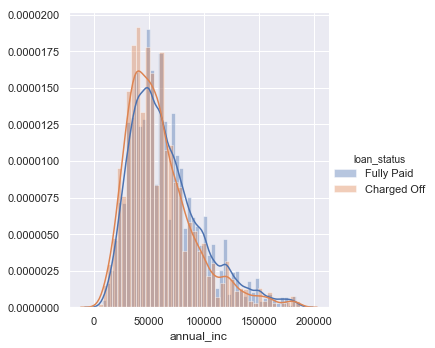

In [1066]:
sns.FacetGrid(bank_data,hue="loan_status",height=5).map(sns.distplot,"annual_inc").add_legend()

We can observe a very slight shift between the two curves, and we should invetigate further

In [1067]:
bank_data['annual_inc'].describe()

count     35970.000000
mean      64573.629988
std       32253.954077
min        4000.000000
25%       40800.000000
50%       58323.500000
75%       80000.000000
max      187000.000000
Name: annual_inc, dtype: float64

Again the boundaries are derived from the distribution plot before. 
* At around a little before 50000 mark we can see a spike happening in the charge of percent, so the first boundary is taken at 40000. 
* At around quarer of 50000 and 100000 we see the charge off rate going below the fully paid curve. So 80000 is taken capture the transition.

In [1068]:
def annual_inc_cat(val):
    if val<=40000:
        return '<40000'
    elif val>40000 and val<=80000: 
        return '<80000'
    else:
        return '>80000'

bank_data['annual_income_cat']  = bank_data.apply(lambda x: annual_inc_cat(x['annual_inc']),axis=1)

In [1142]:
segmented_univariate('annual_income_cat')

annual_income_cat  loan_status
<40000             Charged Off    17.587425
                   Fully Paid     82.412575
<80000             Charged Off    14.308018
                   Fully Paid     85.691982
>80000             Charged Off    11.070286
                   Fully Paid     88.929714
Name: id, dtype: float64


So, we see that people with less income are more likely to default than the people with higher income.
Therefore annual_income can be considered as a driving variable

COLUMN NAME : purpose

We can see that this a categorical vaiable. The only univariate analysis possible is the distribution among different categories.

Distribution of loans over purpose


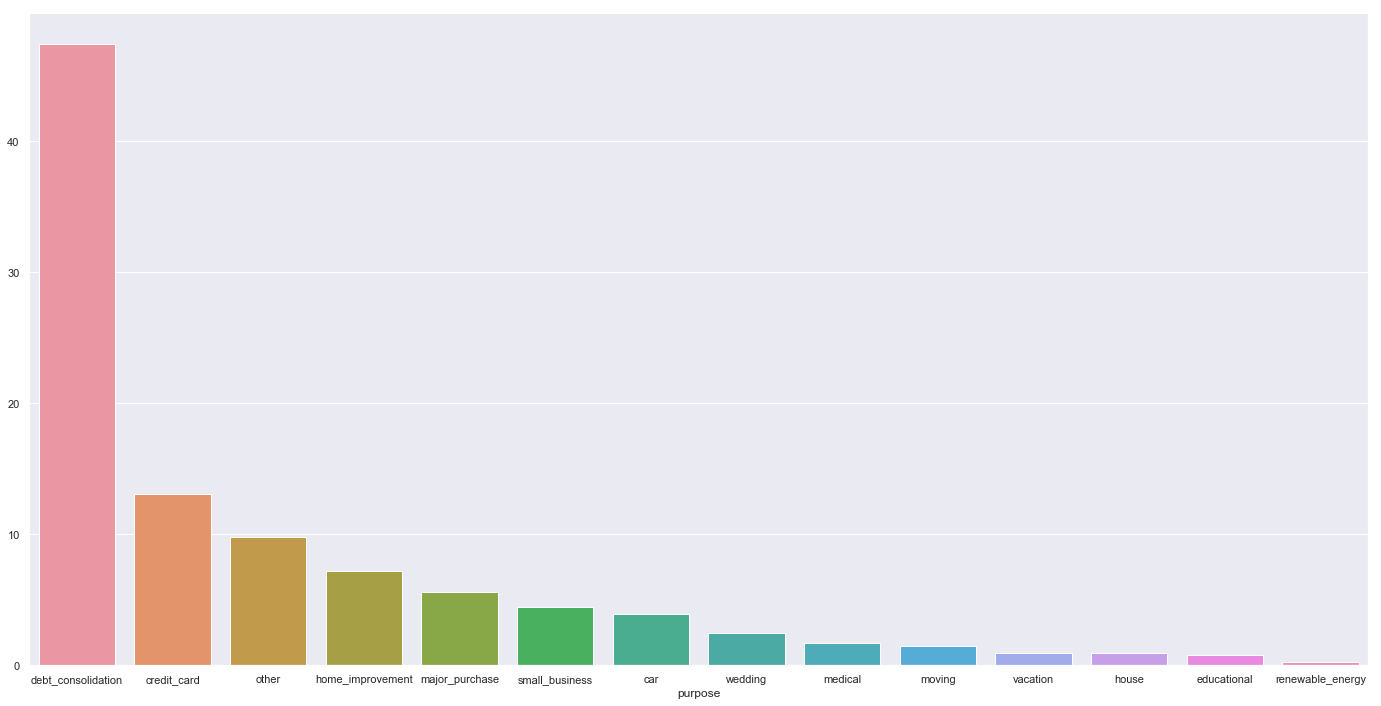

In [1070]:
print('Distribution of loans over purpose')
df = 100*bank_data.groupby('purpose')['id'].count().sort_values(ascending=False)/len(bank_data)
sns.set(rc={'figure.figsize':(24,12)})
sns.barplot(x=df.index,y=df.values)

Distribution of loans over purpose


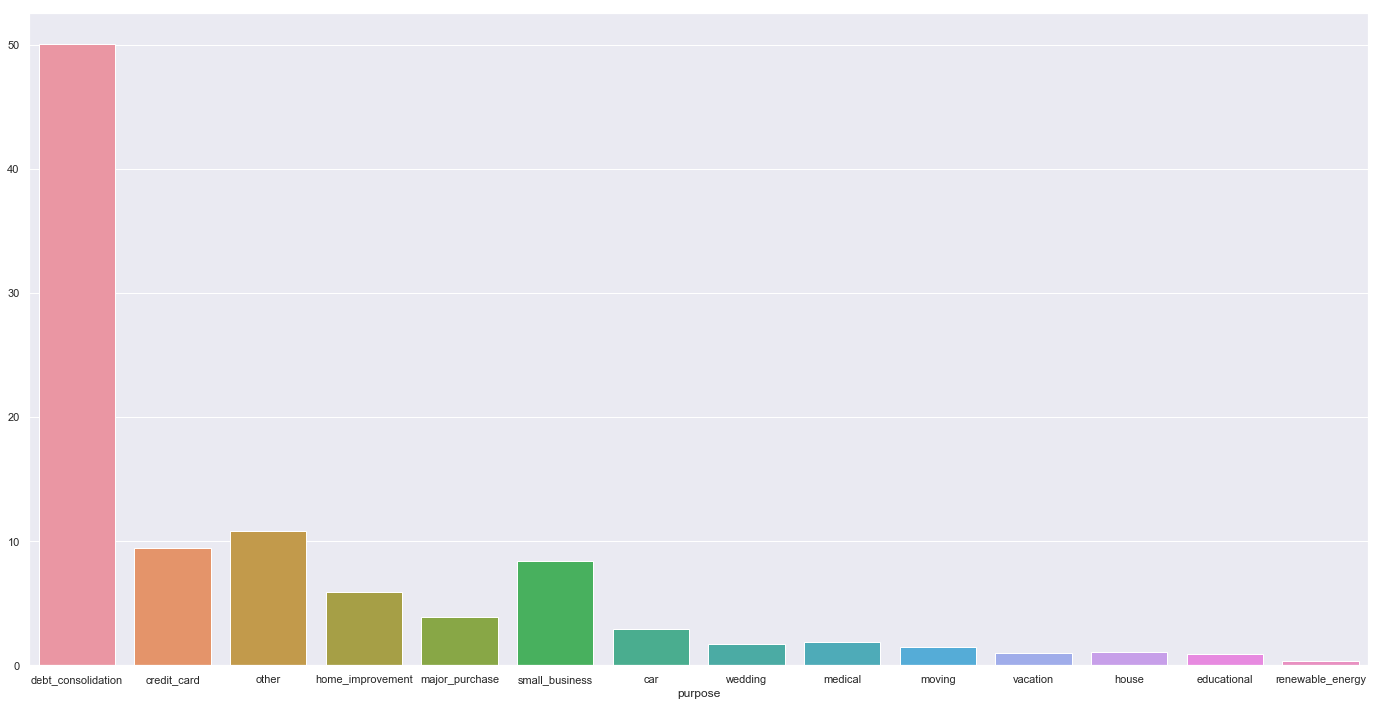

In [1071]:
print('Distribution of loans over purpose')
df2 = 100*bank_data[bank_data['loan_status']=='Charged Off'].groupby('purpose')['id'].count().\
      sort_values(ascending=False)/len(bank_data[bank_data['loan_status']=='Charged Off'])
sns.set(rc={'figure.figsize':(24,12)})
sns.barplot(x=df.index,y=df2[df.index].values)

* We can see that debt_consolidation is the top reason for asking for a loan. Combining debt_consolidation and credit_card we have more than 50 percent of our data. But again we see negligible data in renewable_energy.

In [1072]:
bank_data = bank_data[bank_data['purpose']!='renewable_energy']

COLUMN NAME : zip_code and addr_state

In [1073]:
print(bank_data.groupby('zip_code')['id'].count().sort_values(ascending=False).head(5))

zip_code
100xx    510
945xx    493
112xx    478
606xx    470
900xx    420
Name: id, dtype: int64


So we can see that the zip code can be used to cluster applicants to a region. Similarly, for addr_state column.

AxesSubplot(0.125,0.125;0.775x0.755)


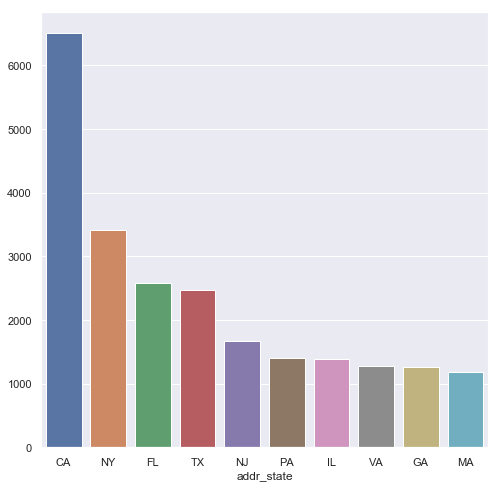

In [1074]:
add_r = bank_data.groupby('addr_state')['id'].count().sort_values(ascending=False).head(10)
sns.set(rc={'figure.figsize':(8,8)})
print(sns.barplot(x=add_r.index,y=add_r.values))

The state with highest loan applicants is California (CA) followed by New York (NY) at almost half the number of applicants

In [1075]:
print('unique values in zip_code',len(set(bank_data['zip_code'])))
print('unique values in addr_state',len(set(bank_data['addr_state'])))

unique values in zip_code 807
unique values in addr_state 49


One point to note about zip_code and addr_state is that there are 49 and 808 unique values respectively. This much variability makes this two less impactful on the target variable loan_status. So,we can remove this two columns

COLUMN NAME: dti

In [1076]:
bank_data['dti'].describe()

count    35881.000000
mean        13.437057
std          6.635053
min          0.000000
25%          8.350000
50%         13.540000
75%         18.680000
max         29.990000
Name: dti, dtype: float64

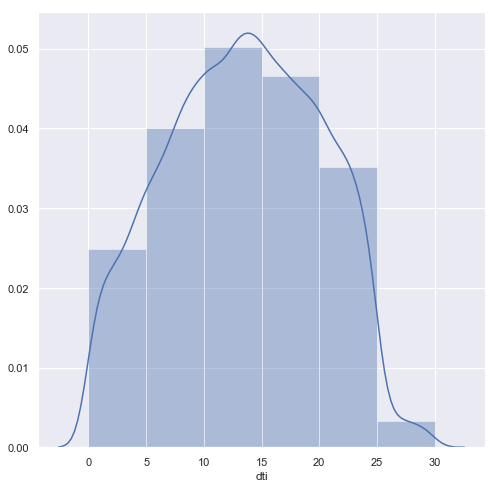

In [1077]:
sns.distplot(bank_data['dti'],bins=[0,5,10,15,20,25,30])

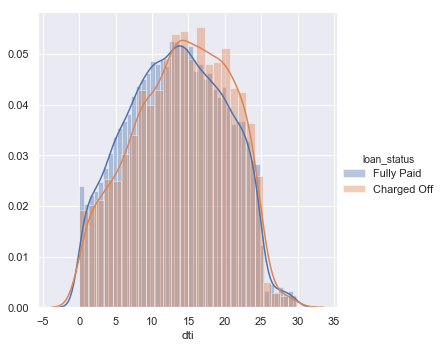

In [1078]:
ax = sns.FacetGrid(bank_data,hue="loan_status",height=5).map(sns.distplot,"dti").add_legend()
ax.savefig('dti_dist.png')

A marked differentiation in number of loans can be seen at the extreme values, indicating a possible factor

The selection of boundaries for categorization are based on following observations:
* As we can see at about 10 percent the charge off percent falls below the fully paid
* The charge of percent rises above fully paid a little after 10 percent and is more till 25 percent. But taking 25 as boundary makes number of cases in last category very low, so 20 is taken

In [1079]:
def dti_cats(val):
    if val<=10:
        return 10
    elif val>10 and val<=20:
        return 20
    elif  val>20 and val<=30:
        return 30
bank_data['dti_cat'] = bank_data.apply(lambda x: dti_cats(x['dti']),axis=1)

In [1143]:
segmented_univariate('dti_cat')

dti_cat  loan_status
10       Charged Off    12.514171
         Fully Paid     87.485829
20       Charged Off    14.808486
         Fully Paid     85.191514
30       Charged Off    16.326531
         Fully Paid     83.673469
Name: id, dtype: float64


We see that chance of charge off increases with increase in dti value as expected, because debt increases and income decreases.
dti can be considered as a driving variable.

Almost a perfectly normally distributed variable denoting the debt to income ratio. The mean value and the median being almost same also indicates that the data distribution is almost perfectly normal.

COLUMN NAME : earliest_cr_line

This is a date type column and we can extract month and year from this data, which will enable us to do year-wise aggregation

In [1081]:
bank_data.loc[:,'earliest_cr_line_year'] = bank_data.apply(lambda x: int(x['earliest_cr_line'].split('-')[1]),axis=1)


Categorizing by 51 years will not be beneficial as not much will be visible

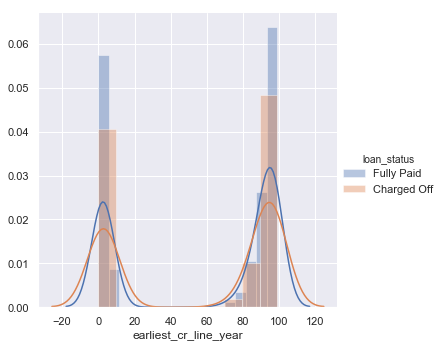

In [1082]:
sns.FacetGrid(bank_data,hue="loan_status",height=5).map(sns.distplot,"earliest_cr_line_year").add_legend()

By categorizing the data based on earliest cr_line in 2000's (0) or older (1) we see that, a large chunk of borrowers have their earliest credit line in the 2000s indicating a young demographic for online loans. While combining 50s,60s,70s,80s,90s we have the other chunk. Percentage wise not much difference is there in terms of charge off. So, we can actually neglect this column.

COLUMN NAME : inq_last_6mths, open_acc and pub_rec 

All three of these can be treated as categorical variables for analysis

Distribution of loans over inq_last_6mths


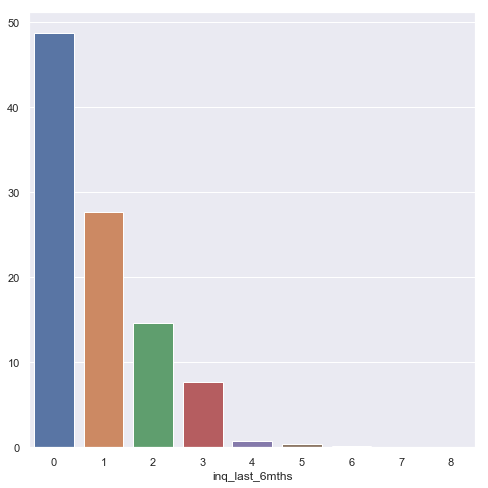

In [1083]:
print('Distribution of loans over inq_last_6mths')
df = 100*bank_data.groupby('inq_last_6mths')['id'].count().sort_values(ascending=False)/len(bank_data)
sns.barplot(x=df.index, y=df.values)

About 50 percent of applicants have had 0 enquiries in last 6 months

Distribution of charged off loans over inq_last_6mths


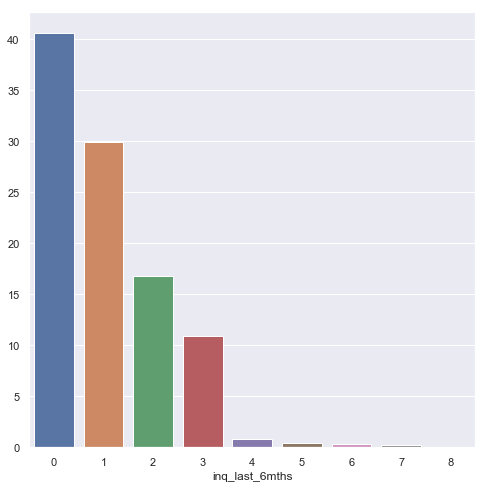

In [1084]:
print('Distribution of charged off loans over inq_last_6mths')
df2 = 100*bank_data[bank_data['loan_status']=='Charged Off'].groupby('inq_last_6mths')['id'].count().\
      sort_values(ascending=False)/len(bank_data[bank_data['loan_status']=='Charged Off'])
sns.barplot(x=df.index,y=df2[df.index].values)

We can see that the distribution of number of loans and charged off loans is very similar.Also categories 5,6,7,8 has too little data, so it will be better to neglect them.

In [1085]:
bank_data = bank_data[~bank_data['inq_last_6mths'].isin([5,6,7,8])]

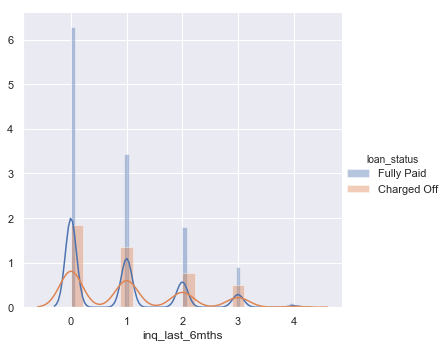

In [1086]:
sns.FacetGrid(bank_data,hue="loan_status",height=5).map(sns.distplot,"inq_last_6mths").add_legend()

No variation across different categories can be observes hence neglecting the inquery in last 6 months

Distribution of open_acc


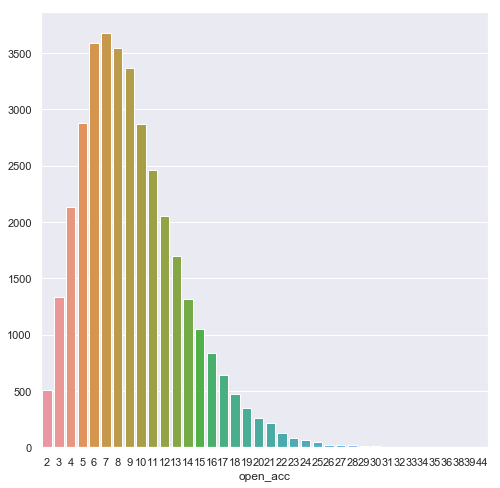

In [1087]:
print('Distribution of open_acc')
df = bank_data.groupby('open_acc')['id'].count().sort_values(ascending=False)
sns.barplot(x=df.index, y=df.values)

Dsitribution of Charged off loans over open_credit_lines


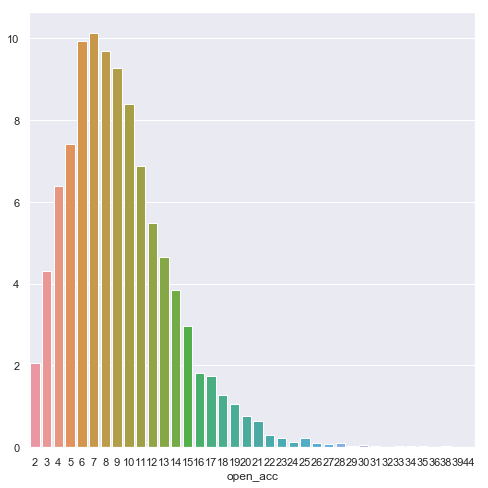

In [1088]:
print('Dsitribution of Charged off loans over open_credit_lines')
df2 = 100*bank_data[bank_data['loan_status']=='Charged Off'].groupby('open_acc')['id'].count().\
      sort_values(ascending=False)/len(bank_data[bank_data['loan_status']=='Charged Off'])
sns.barplot(x=df.index,y=df2[df.index].values)

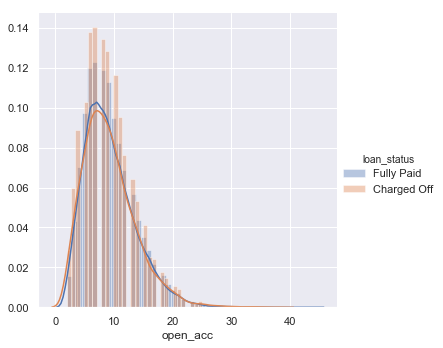

In [1089]:
sns.FacetGrid(bank_data,hue="loan_status",height=5).map(sns.distplot,"open_acc").add_legend()

Points to note:
* All applicants have atleast 2 open credit lines
* The maximum number of applicants had 7 open credit lines

As the two distributions match very closely and are almost normal dist,the effect of  number of open_acc is neglected.

Distribution of pub_rec


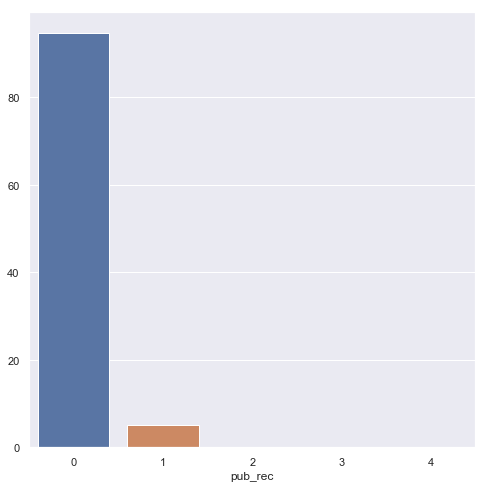

In [1090]:
print('Distribution of pub_rec')
df = 100*bank_data.groupby('pub_rec')['id'].count().sort_values(ascending=False)/len(bank_data)
sns.barplot(x=df.index, y=df.values)

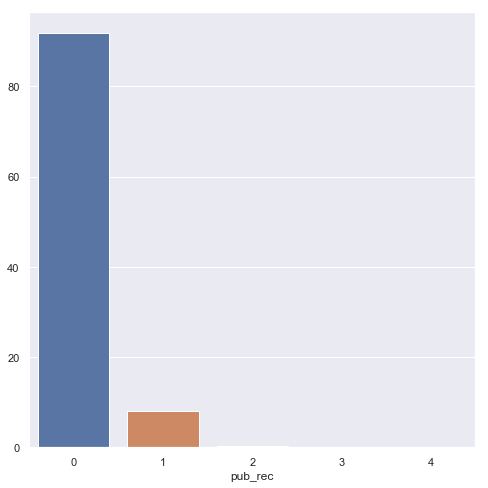

In [1091]:
df2 = 100*bank_data[bank_data['loan_status']=='Charged Off'].groupby('pub_rec')['id'].count().\
      sort_values(ascending=False)/len(bank_data[bank_data['loan_status']=='Charged Off'])
sns.barplot(x=df.index,y=df2.reindex(index=df.index).values)

So, most people never had any public records against them. Again this varible will be of very less impact as almost all data belongs to same category.

COLUMN NAME : revol_bal and revol_util

In [1092]:
bank_data['revol_bal'].describe()

count     35652.000000
mean      12977.273701
std       14980.597448
min           0.000000
25%        3712.000000
50%        8782.500000
75%       16721.000000
max      149527.000000
Name: revol_bal, dtype: float64

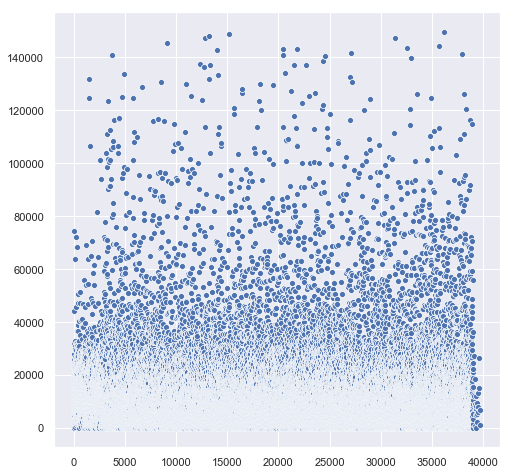

In [1093]:
sns.scatterplot(data=bank_data['revol_bal'])

We can spot some outliers. But the question is that whether this should be preserved for variability or removed to reduce variance.

In [1094]:
max_val = 16684 + 1.5*(16684 - 3688.5)
print('percent of charged off loans above 1.5IQR', 100*len(bank_data[(bank_data['revol_bal']>max_val) & 
                                                    (bank_data['loan_status']=='Charged Off')])/
                                                    len(bank_data[bank_data['loan_status']=='Charged Off']))
max_val = 16684 + 2.5*(16684 - 3688.5)
print('percent of charged off loans above 2.5IQR', 100*len(bank_data[(bank_data['revol_bal']>max_val) & 
                                                    (bank_data['loan_status']=='Charged Off')])/
                                                    len(bank_data[bank_data['loan_status']=='Charged Off']))

max_val = 16684 + 4*(16684 - 3688.5)
print('percent of charged off loans above 4IQR', 100*len(bank_data[(bank_data['revol_bal']>max_val) & 
                                                    (bank_data['loan_status']=='Charged Off')])/
                                                    len(bank_data[bank_data['loan_status']=='Charged Off']))

percent of charged off loans above 1.5IQR 6.322176551184185
percent of charged off loans above 2.5IQR 2.740262282247015
percent of charged off loans above 4IQR 1.272264631043257


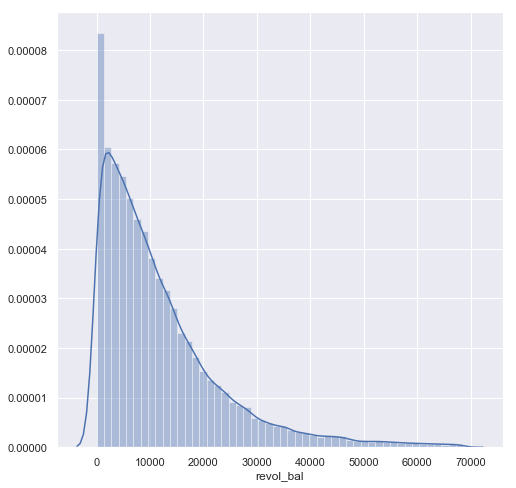

In [1095]:
sns.distplot(bank_data[bank_data['revol_bal']<=max_val]['revol_bal'])

From above we can see that the higher values arise very naturally if we assume a normal distribution.
At 4IQR range the number of values decreases close to 1.

In [1096]:
bank_data = bank_data[bank_data['revol_bal']<=max_val]

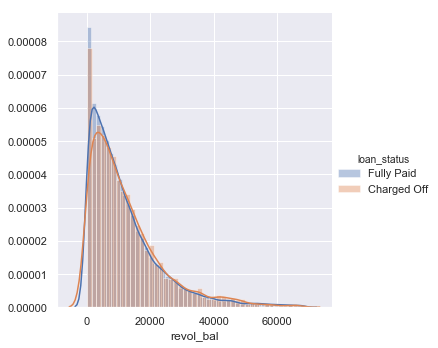

In [1097]:
sns.FacetGrid(bank_data,hue="loan_status",height=5).map(sns.distplot,"revol_bal").add_legend()

In [1098]:
bank_data['revol_bal'].describe()

count    35150.000000
mean     11850.733713
std      11485.836768
min          0.000000
25%       3648.250000
50%       8628.000000
75%      16230.750000
max      68632.000000
Name: revol_bal, dtype: float64

Revolving balance denotes the amount of money owed through revolving loan like credit card. In itself a high revolving balance shows that customer uses to much credit, so we can expect charge off to increase  But it is a weak indicator of charge off as can be seen from the above graph. Revolving balance utilisation is a much better indicator.

In [1099]:
#removing percentage sign from revol_util
bank_data['revol_util'] = bank_data.apply(lambda x: float(x['revol_util'][:-1]),axis=1)

In [1100]:
bank_data['revol_util'].describe()

count    35150.000000
mean        49.020378
std         28.224416
min          0.000000
25%         25.700000
50%         49.500000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

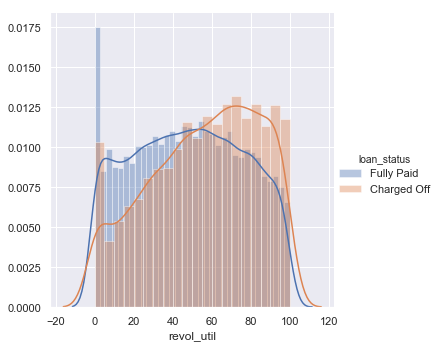

In [1101]:
ax=sns.FacetGrid(bank_data,hue="loan_status",height=5).map(sns.distplot,"revol_util").add_legend()
ax.savefig('revol_utl_dist.png')

A very high differentiation in number of loans at the extreme values can be observed, showing a strong influence

Revolving utilisation is the ratio of revolving balance to credit limit. The higher the utilisation rate, higher is the chance of charge off, as the person is nearing the credit limit and not paying off.

For revol_utl clearly 50 is the point of inflection

In [1102]:
def revl_utl_cat(val):
    if val<=50:
        return 50
    else:
        return 100

bank_data['revol_utl_cat'] = bank_data.apply(lambda x: revl_utl_cat(x['revol_util']),axis=1)


In [1144]:
segmented_univariate('revol_utl_cat')

revol_utl_cat  loan_status
50             Charged Off    11.369640
               Fully Paid     88.630360
100            Charged Off    17.405082
               Fully Paid     82.594918
Name: id, dtype: float64


We see a very clear trend that matches our intuition completely. The higher category from 50-100 has 17.25 percent charge off rate, 6 percent more than the lower category.

Clearly revol_utl is a driver variable

COLUMN NAME : pub_rec_bankruptcies and total_acc

Distribution of loans over pub_rec_bankruptcies


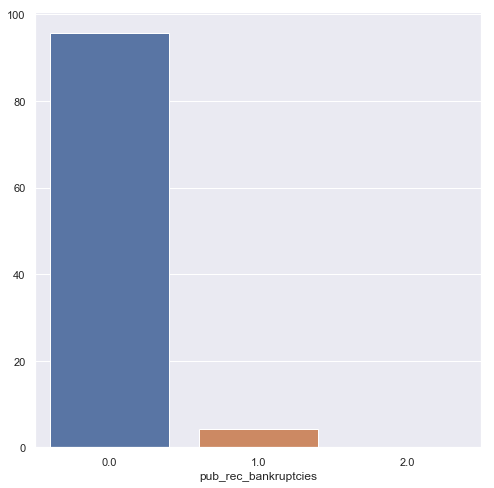

In [1104]:
print('Distribution of loans over pub_rec_bankruptcies')
df = 100*bank_data.groupby('pub_rec_bankruptcies')['id'].count().sort_values(ascending=False)/len(bank_data)
sns.barplot(x=df.index, y=df.values)

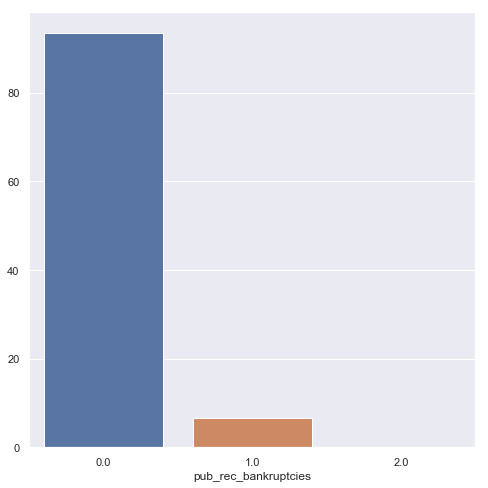

In [1105]:
df2 = 100*bank_data[bank_data['loan_status']=='Charged Off'].groupby('pub_rec_bankruptcies')['id'].count().\
      sort_values(ascending=False)/len(bank_data[bank_data['loan_status']=='Charged Off'])
sns.barplot(x=df.index,y=df2[df.index].values)

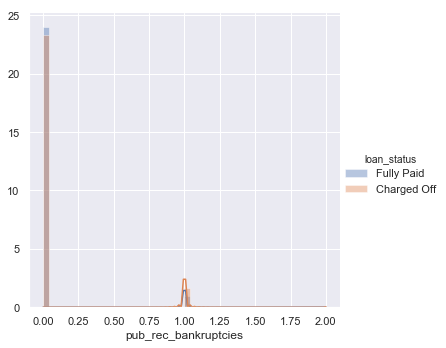

In [1106]:
sns.FacetGrid(bank_data,hue="loan_status",height=5).map(sns.distplot,"pub_rec_bankruptcies").add_legend()

As before most data belongs to a single group making this a very less impactful column. So we neglect it.

Logically open_acc and total_acc should be highly correlated as open_acc is a subset of total_acc

In [1107]:
bank_data[['open_acc','total_acc']].corr()

,open_acc,total_acc
open_acc,1.00000,0.68153
total_acc,0.68153,1.00000


But as these have zero values deriving a new column will be difficult. And as they are correlated, we can neglect total_acc also

Lastly we have interest rate.

In [1108]:
bank_data['int_rate'] = bank_data.apply(lambda x: x['int_rate'].split('%')[0],axis=1)

In [1109]:
bank_data['int_rate'] = bank_data['int_rate'].astype('float')

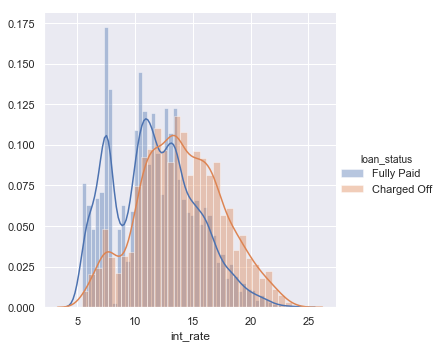

In [1110]:
ax = sns.FacetGrid(bank_data,hue="loan_status",height=5).map(sns.distplot,"int_rate").add_legend()
ax.savefig('interest_rate_dist.png')

We can observe the strongest differentiation so far, and interest rate is possibly one of the most important driver variables.

In [1111]:
bank_data['int_rate'].describe()

count    35150.000000
mean        11.958453
std          3.694304
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.110000
Name: int_rate, dtype: float64

* at little after 10 a large spike in fully paid loans is observed, so 8 is taken as the first cut-off
* For later ones the difference of 8 is used for symmetry

In [1112]:
def interest_cat(val):
    if val<=8:
        return 8
    elif val>8 and val<=16:
        return 16
    else:
        return 24

bank_data['int_cat'] = bank_data.apply(lambda x: interest_cat(x['int_rate']),axis=1)

In [1145]:
segmented_univariate('int_cat')

int_cat  loan_status
8        Charged Off     5.089262
         Fully Paid     94.910738
16       Charged Off    14.208808
         Fully Paid     85.791192
24       Charged Off    28.944199
         Fully Paid     71.055801
Name: id, dtype: float64


We see a highly differentiated charged off rate across different interest rate categories. For low interest we see a mere 5 percent charge off while for 16-24% the charge off rate is whooping 29 percent.

Therefore int_rate is a driver variable.

In [1114]:
verif = set(bank_data['verification_status'])
i = [1,2,3]
verif_dic = dict(zip(verif,i))
bank_data['verification_status'] = bank_data.apply(lambda x: verif_dic[x['verification_status']],axis=1)

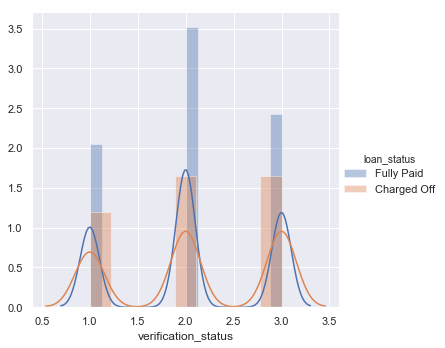

In [1115]:
sns.FacetGrid(bank_data,hue="loan_status",height=5).map(sns.distplot,"verification_status").add_legend()

No variation across the groups is observed

COLUMN NAME : installment

In [1116]:
bank_data['installment'].describe()

count    35150.000000
mean       317.951541
std        202.567500
min         16.080000
25%        165.742500
50%        276.060000
75%        417.220000
max       1305.190000
Name: installment, dtype: float64

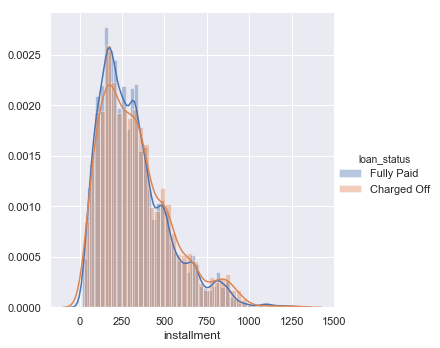

In [1117]:
sns.FacetGrid(bank_data,hue="loan_status",height=5).map(sns.distplot,"installment").add_legend()

A slight variation is observed around 375 which is worth investigating.

In [1118]:
def installment_cat(val):
    if val<=400:
        return 400
    elif val>400 and val<=800:
        return 800
    else:
        return 1200
bank_data['inst_cat'] = bank_data.apply(lambda x: installment_cat(x['installment']),axis=1)

In [1146]:
segmented_univariate('inst_cat')

KeyError: 'inst_cat'

Although a very small trend, it matches with our intuition that as higher interest is causing higher charge off, so should higher installment

In [1120]:
bank_data['int_rate'].describe()

count    35150.000000
mean        11.958453
std          3.694304
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.110000
Name: int_rate, dtype: float64

In [1121]:
bank_data[['int_rate','installment','loan_amnt']].corr()

,int_rate,installment,loan_amnt
int_rate,1.000000,0.268972,0.291896
installment,0.268972,1.000000,0.930608
loan_amnt,0.291896,0.930608,1.000000


As we can see although correlation with int_rate is low (unexpectedly), it has very high correlation with loan_amnt

In [1122]:
# We can derive a new column from the two
bank_data['inst_to_loan_amnt'] = bank_data['installment']/bank_data['loan_amnt']

In [1123]:
bank_data[['int_rate','inst_to_loan_amnt','loan_amnt']].corr()

,int_rate,inst_to_loan_amnt,loan_amnt
int_rate,1.000000,-0.047472,0.291896
inst_to_loan_amnt,-0.047472,1.000000,-0.308375
loan_amnt,0.291896,-0.308375,1.000000


We see a low correlation now.

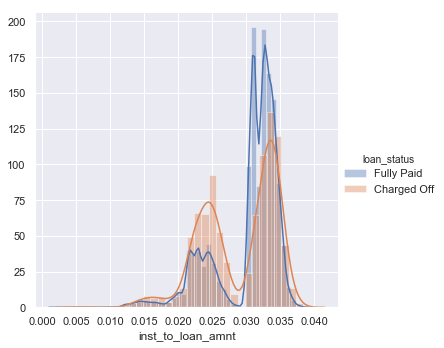

In [1124]:
ax=sns.FacetGrid(bank_data,hue="loan_status",height=5).map(sns.distplot,"inst_to_loan_amnt").add_legend()
ax.savefig('inst_loan_dist.png')

We see the new variable inst_to_loan_amnt is a much stronger driver than either installment or loan amount.

We can categorize it based on the below points:
* at around 0.0275 a sharp rise in charged off percent is noted,and around 0.03 a sharp rise is fully paid is seen.
* so 0.03 will be a good differentiator

In [1125]:
def inst_loan_cat(val):
    if val<=0.03:
        return '<0.03'
    else:
        return '>0.03'
bank_data['inst_to_loan_cat'] = bank_data.apply(lambda x: inst_loan_cat(x['inst_to_loan_amnt']),axis=1)

In [1147]:
segmented_univariate('inst_to_loan_cat')

inst_to_loan_cat  loan_status
<0.03             Charged Off    24.314559
                  Fully Paid     75.685441
>0.03             Charged Off    10.707071
                  Fully Paid     89.292929
Name: id, dtype: float64


As expected we see a very strong differentiation, below 0.03 a whooping 24 percent people were charged off while above 0.03 only 11 percent. This is a very strong driver.




So after the above analysis we could draw the following conclusions:
* We could identify the following driver variables : loan_amnt, term, grade, annual_inc, dti, revol_utl, int_rate and inst_to_loan_amnt (derived variable)
* Among the above revol_utl, term , grade, int_rate and inst_to_loan_cat are the srongest differentiators between charged off and fully paid loans

In [1127]:
bank_data = bank_data[['id','loan_amnt_cat','term','grade'
                       ,'annual_income_cat','dti_cat',
                       'revol_utl_cat','int_cat','inst_to_loan_cat','loan_status']]

BIVARIATE ANALYSIS

In [1128]:
len(bank_data)

35150

For bivariate analysis our target variable is loan_status

To study the relationship between loan_amnt and loan_status, we need to convert loan_amnt to categorical variable.

In [1129]:
bank_data.columns

Index(['id', 'loan_amnt_cat', 'term', 'grade', 'annual_income_cat', 'dti_cat',
       'revol_utl_cat', 'int_cat', 'inst_to_loan_cat', 'loan_status'],
      dtype='object')

Among the driver variables, one important thing will be to see how loan_amnt,annual_income varies with term

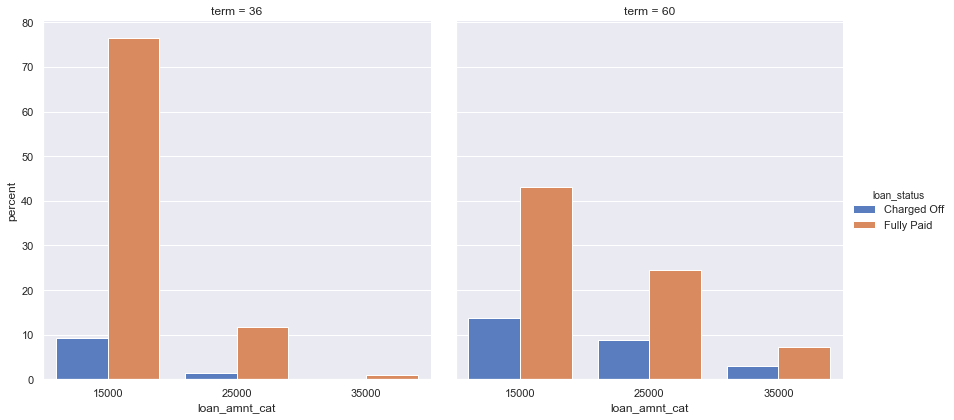

In [1130]:
bivariate_analysis('term','loan_amnt_cat','',(15,15))

Significant observations:
* for shorter term the number of loans of smaller amount occupy almost 76 percent. This is expected by common sense.
* the loans are much more evenly distributed for 60 months term. We see a marked rise in charged off percent in all categories, but most significantly in the middle level, where it increases almost 5 times.
* the number of high value loans are much smaller compared to the other two categories, but has a comparatively high charge of percent

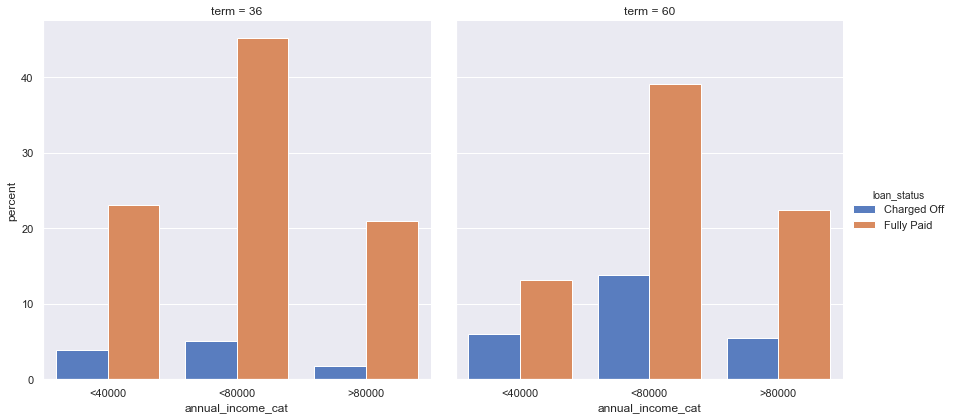

In [1131]:
bivariate_analysis('term','annual_income_cat','',(20,15))

Significant observations:
* In both terms 40000-80000 category are the highest borrower accounting for about 40 percent. Only 5 percent charge off is noticed in 36 months term, while 15 percent charge off in 60 months term
* Low income bracket are much more likely to take a 36 months term and pay off. In 60 months term only 13 percent loans belong to low income cat but 7 percent of charged off loans are from it. 

The next analysis is to see how annual_income and loan_amnt is related

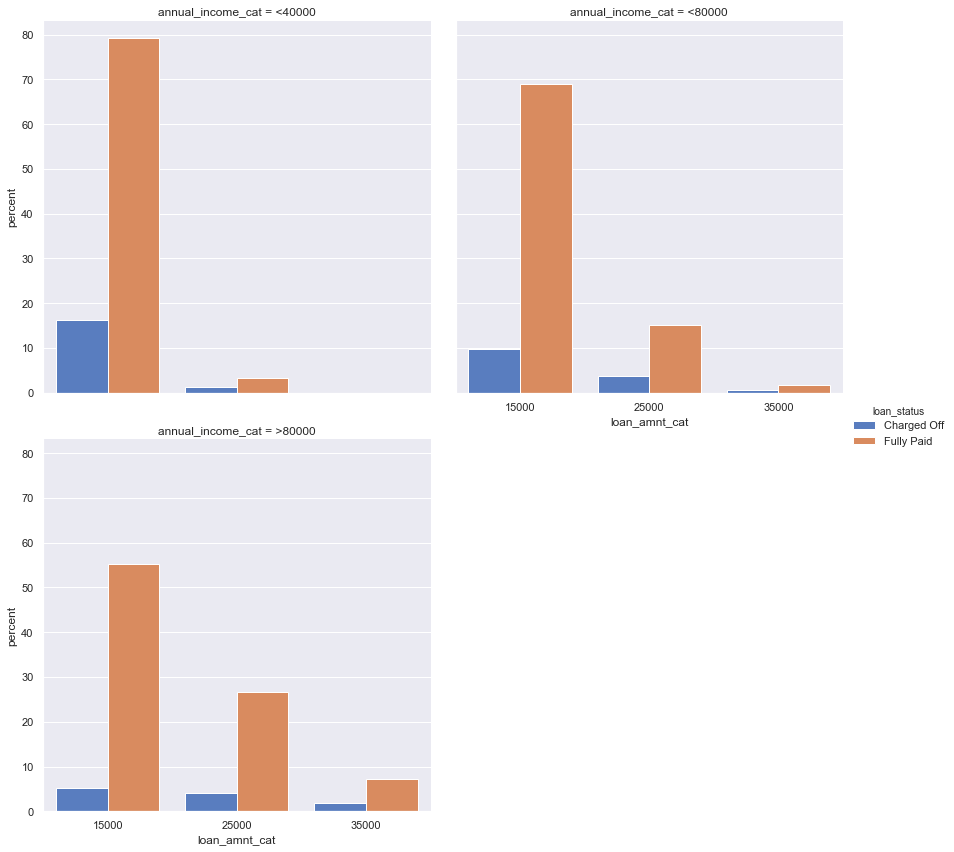

In [1132]:
bivariate_analysis('annual_income_cat','loan_amnt_cat','',(20,15))

Significant observations:
* High income categories are more likely to get higher value loans, and pay off.
* Anyone with income less than 40000 dollars will not get high value loans, and more likely to default loans more than 15000 dollars (from first graph)


Next we plot annual_income and interest rate

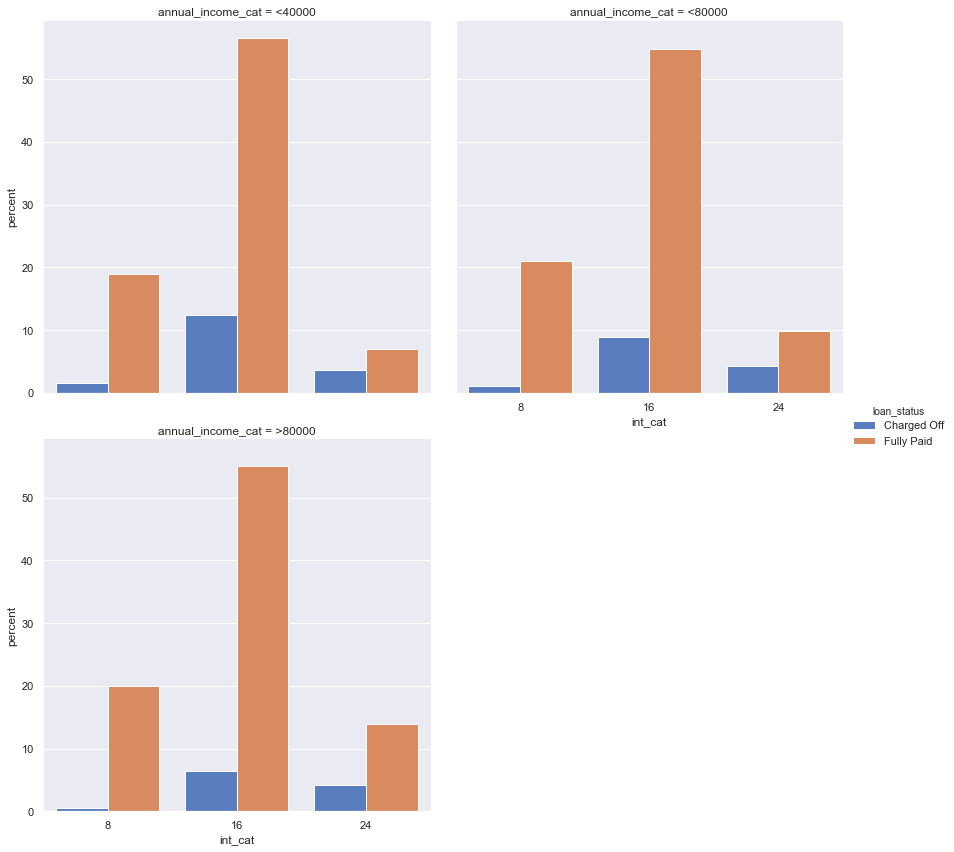

In [1133]:
bivariate_analysis('annual_income_cat','int_cat','',(20,15))

Significant observations:
* high income people are unlikely to get charged off for low interest rates
* low and middle income groups are very likely to get charged off for interest rates higher than 16

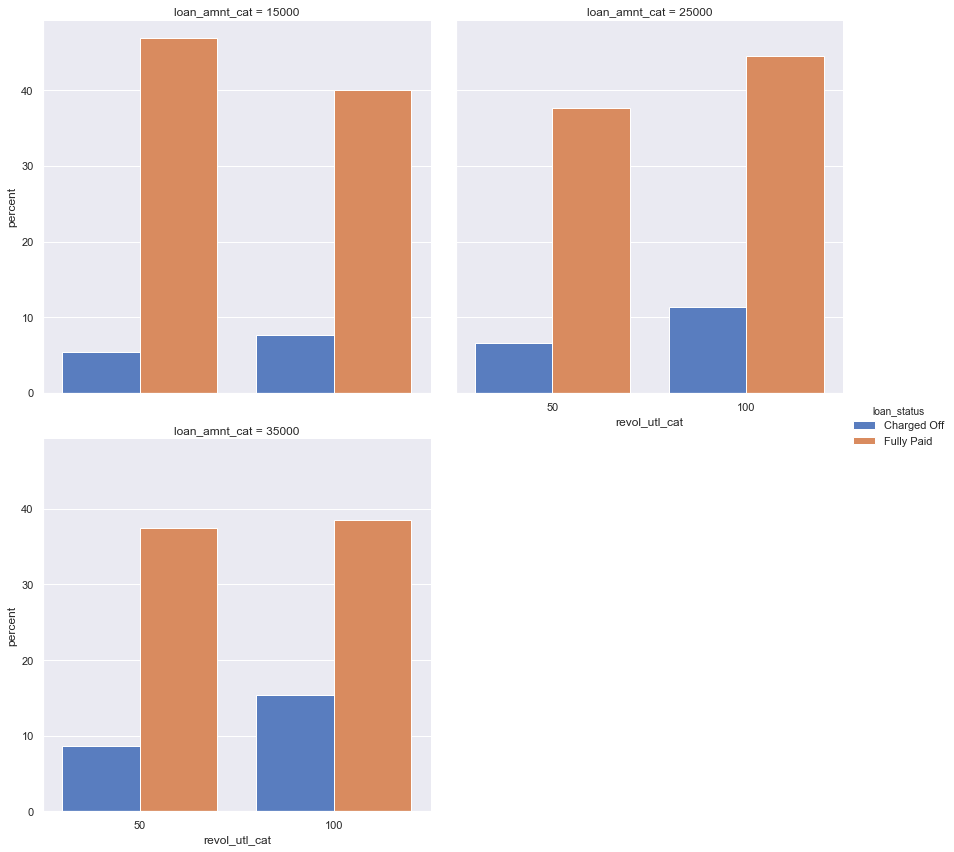

In [1134]:
bivariate_analysis('loan_amnt_cat','revol_utl_cat','',(20,15))

* For greater than 15000 dollars amount loans higher revolving utilisation categories are much more likely to get charged off, than lower rev_utl category (<50)

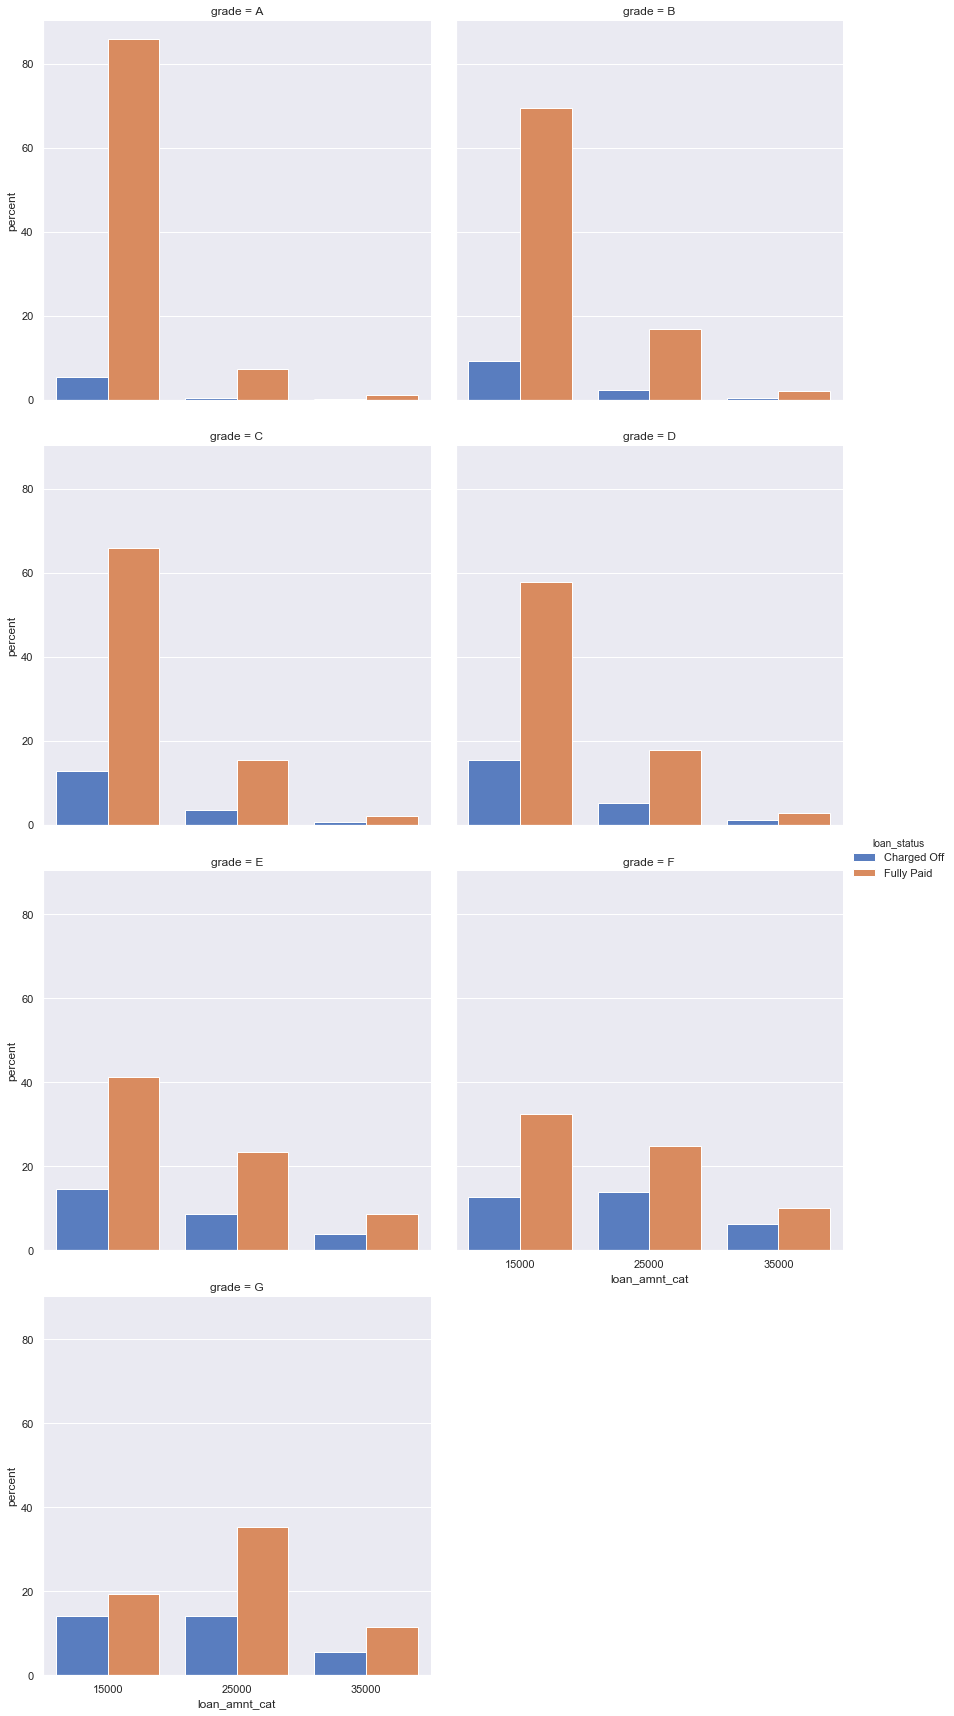

In [1135]:
bivariate_analysis('grade','loan_amnt_cat','',(20,15))

* for high amount loans the categories D,E,F are very likely to get charged off.
* grade A and B are very safe in almost all loan amounts,
* the percent of high amount loans increases from C to G categories and are more likely to get charged off.


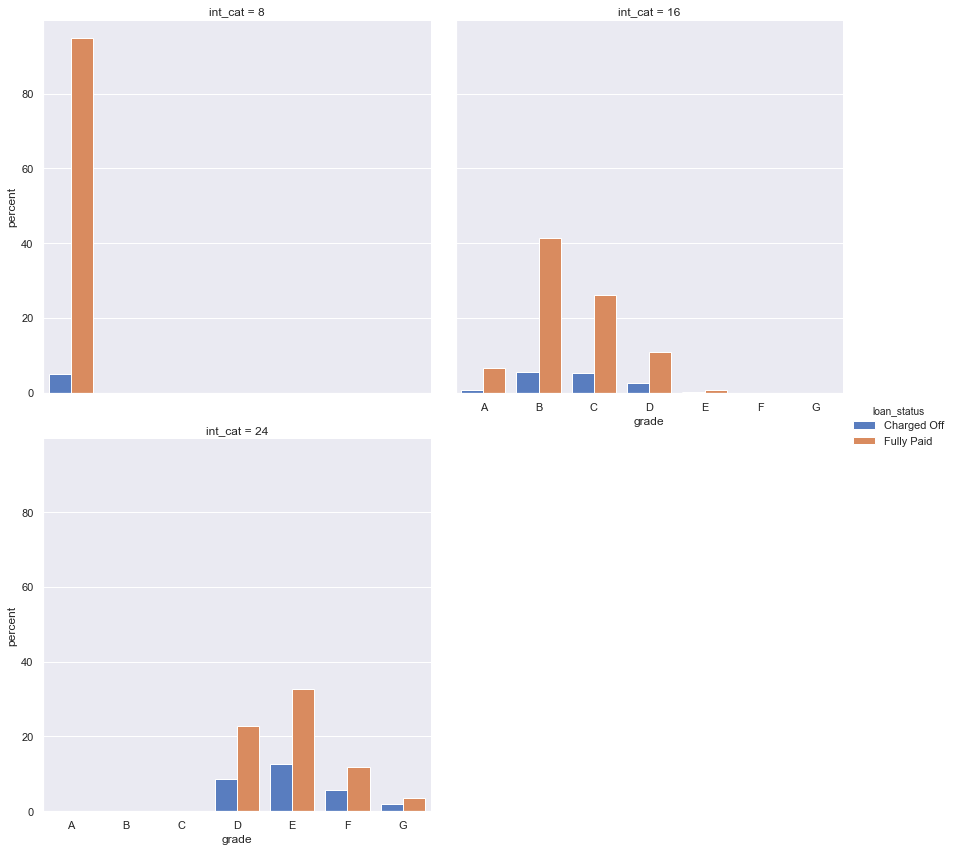

In [1136]:
bivariate_analysis('int_cat','grade','',(20,15))

As can be seen the company is already using grade to differentiate between risky and safe loans, and assigining interest rate accordingly. The more risky a loan the higher the interest charged

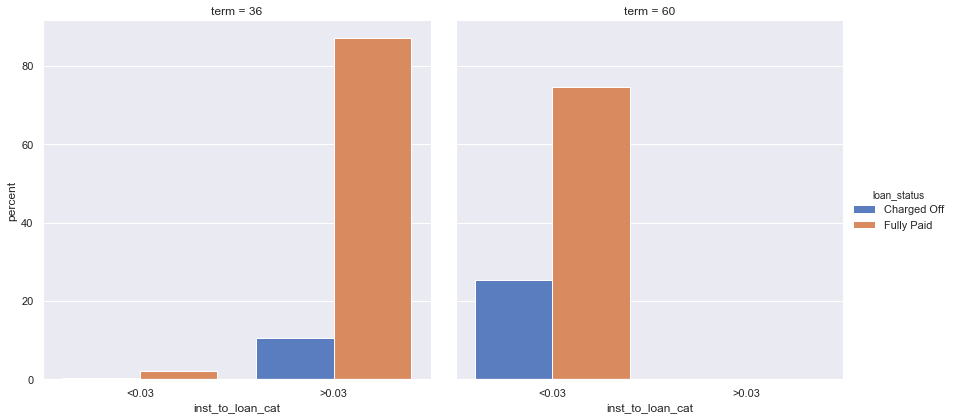

In [1137]:
bivariate_analysis('term','inst_to_loan_cat','',(20,15))

The above graph shows a clear picture how with lower installment to loan amount ratio leads to more charge off in 60 months terms

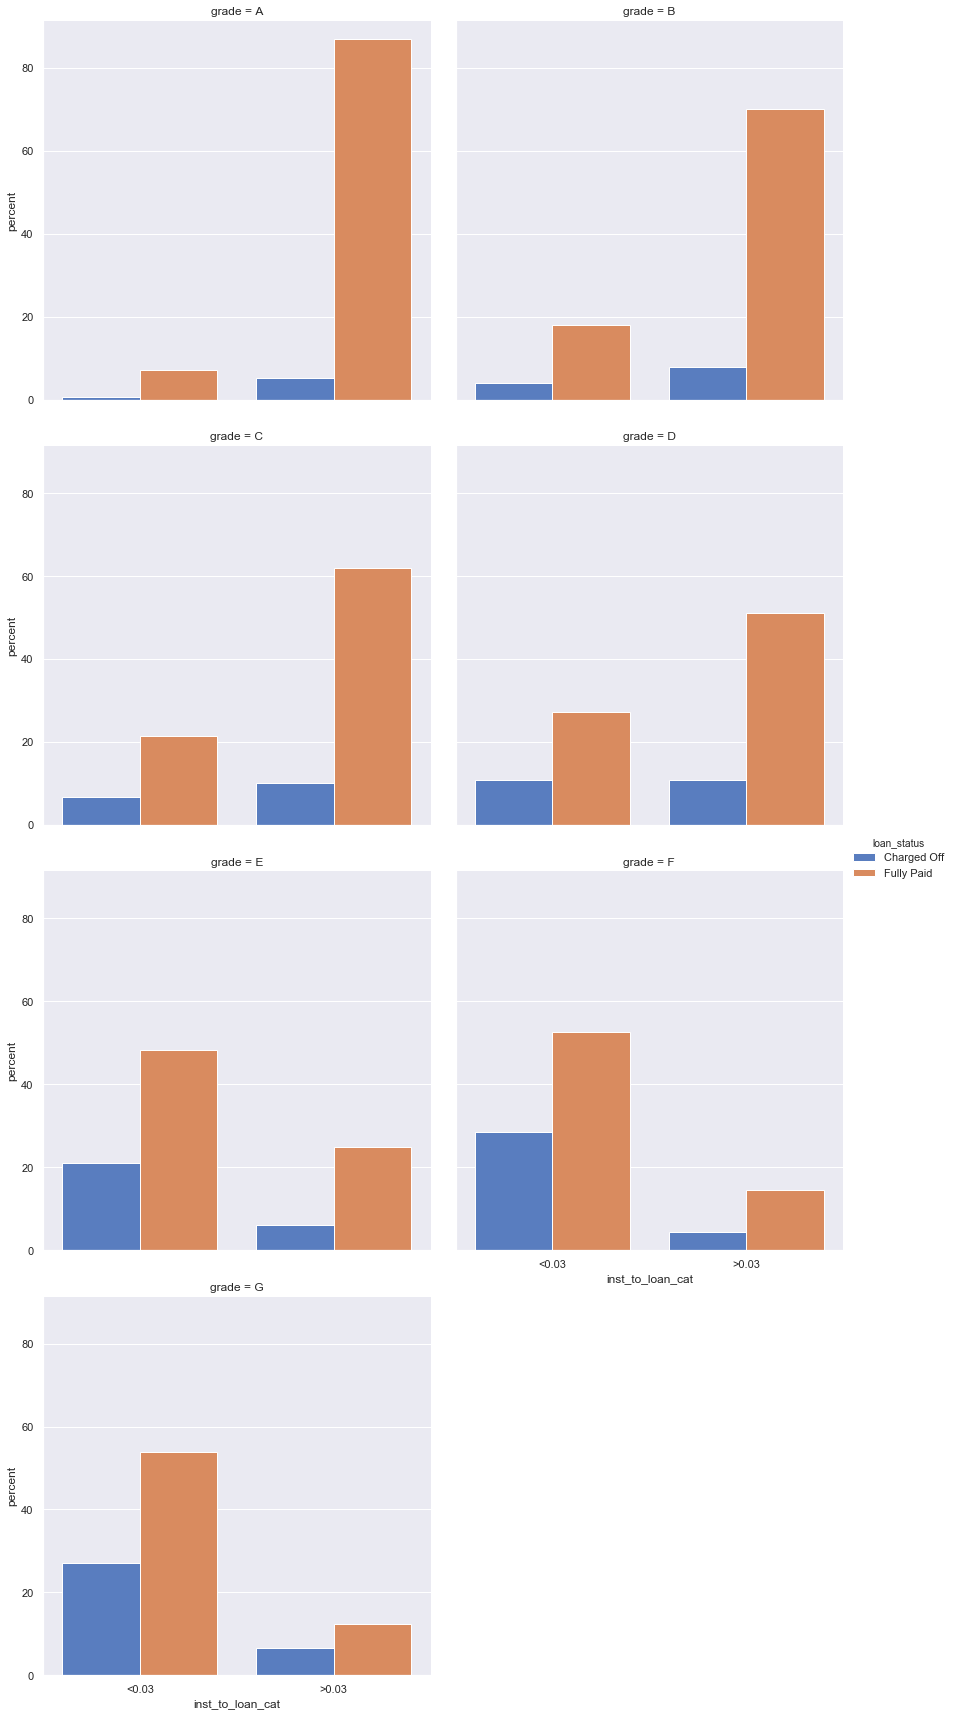

In [1138]:
bivariate_analysis('grade','inst_to_loan_cat','',(20,15))

We see that inst_to_loan_cat a very prominent variation with grade. inst_to_loan_amnt denotes the ratio of installment to loan amount. We can see that for riskier grades i.e, D, E, F, G the percentage of loans with lower inst_to_loan_amnt increases with corresponding increase in charge off.

CONCLUSION

From the above analysis the following conclusions can be drawn:
1. We have identified the following strongest driver variables for identifying charged off loans:  term, grade , interest rate,revolving balance utilisation ,installment to loan amount ratio.
2. Loans of 60 months term (specially with loan amount greater than 25000) are much more likely to get charged off
3. Loans of grades A and B are very safe, while E and F are very unsafe
4. Higher interest rate loans(>16 percent) are very likely to be charged off and are always in D,E,F or G grades
5. Installment to loan amount ratio has a huge impact and any value lesser than 0.03 makes the loan likely to be charged off. 
6. Revolving balance utilisation denotes the loan payoff rate of the applicant. Higher the value more likely the applicant is to charge off. Currently a high percentage of high value loans given out have higher revol_utl.